### 1:Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Predictive-Analysis-and-Strategic-Insights-for-Portuguese-Bank-Marketing-Campaigns/main/Dataset/bank-additional-full.csv')


In [3]:
# Display the first five rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Checking the info of the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2: Data Preprocessing

In [7]:
# Dropping 'duration' column as it should not be used for prediction
df = df.drop(columns=['duration'])

In [8]:
# Encoding categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

label_encoders = {}
for column in categorical_vars:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [9]:
# Encoding the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [10]:
# Splitting the data into training and testing sets
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3: Exploratory Data Analysis (EDA)

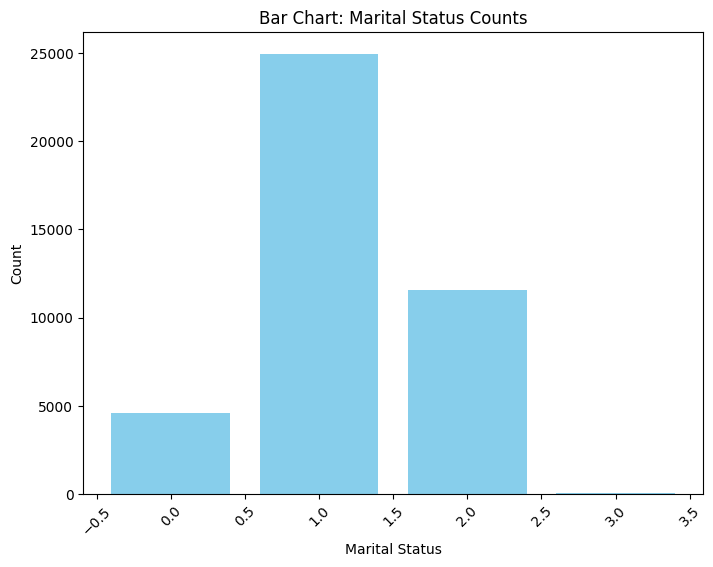

In [24]:
#Bar Chart

# Count of marital statuses
marital_counts = df['marital'].value_counts()

plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
plt.bar(marital_counts.index, marital_counts.values, color='skyblue')  # Plot bar chart
plt.xlabel('Marital Status')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.title('Bar Chart: Marital Status Counts')  # Set title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

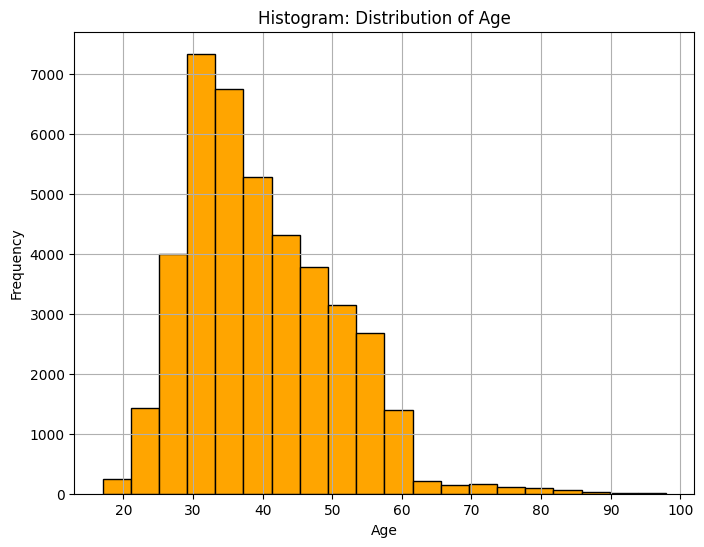

In [25]:
# Histogram

plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
plt.hist(df['age'], bins=20, color='orange', edgecolor='black')  # Plot histogram with 20 bins
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.title('Histogram: Distribution of Age')  # Set title of the plot
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

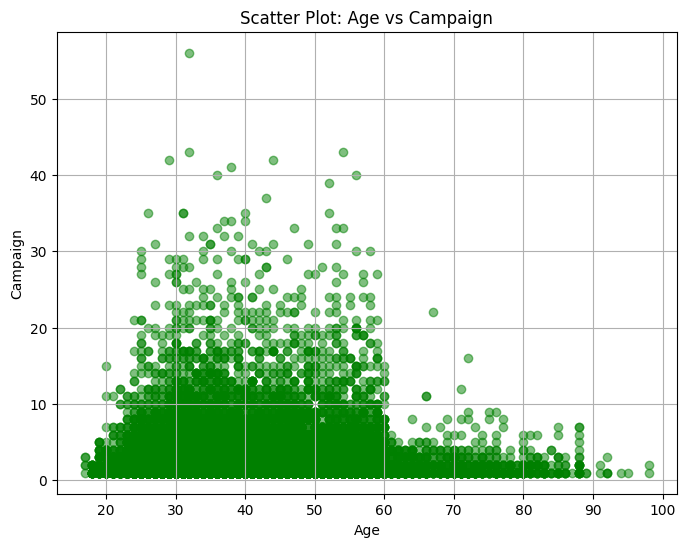

In [26]:
# Scatter Plot

plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
plt.scatter(df['age'], df['campaign'], color='green', alpha=0.5)  # Plot scatter plot
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Campaign')  # Set y-axis label
plt.title('Scatter Plot: Age vs Campaign')  # Set title of the plot
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

C:\Users\carrefour\AppData\Local\Temp\ipykernel_6400\689556342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education', y='age', data=df, palette='Set2')  # Plot box plot using Seaborn


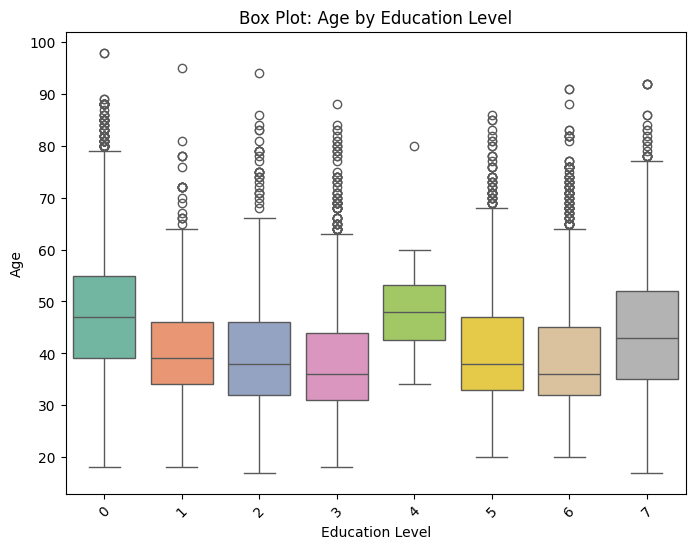

In [27]:
# Box Plot

plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
sns.boxplot(x='education', y='age', data=df, palette='Set2')  # Plot box plot using Seaborn
plt.xlabel('Education Level')  # Set x-axis label
plt.ylabel('Age')  # Set y-axis label
plt.title('Box Plot: Age by Education Level')  # Set title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

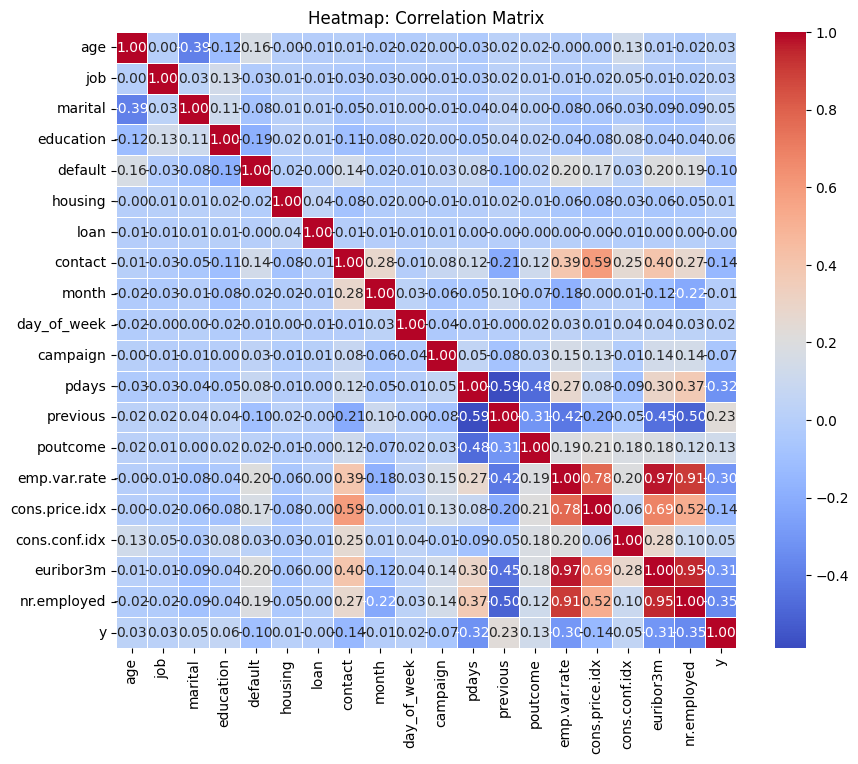

In [28]:
# Assuming you want to plot correlations among numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))  # Create a new figure with size 10x8 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Plot heatmap with annotations
plt.title('Heatmap: Correlation Matrix')  # Set title of the plot
plt.show()  # Display the plot

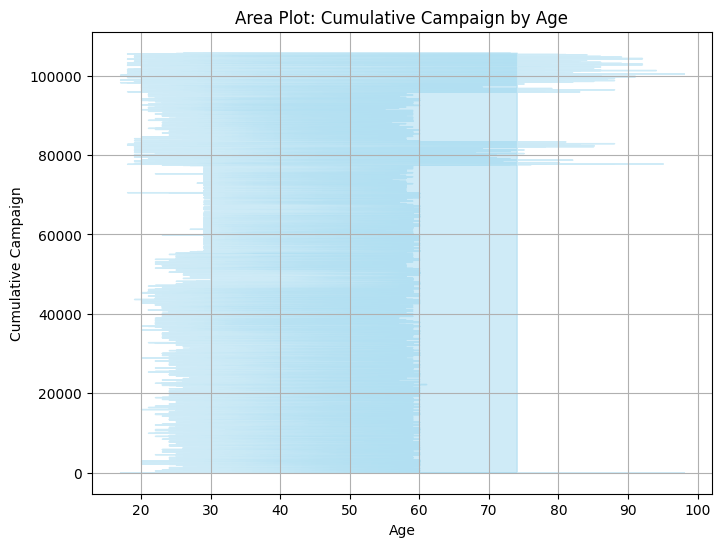

In [29]:
# Area Plot

# Example of cumulative sum of 'campaign' over 'age'
plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
plt.fill_between(df['age'], df['campaign'].cumsum(), color='skyblue', alpha=0.4)  # Plot area plot
plt.xlabel('Age')  # Set x-axis label
plt.ylabel('Cumulative Campaign')  # Set y-axis label
plt.title('Area Plot: Cumulative Campaign by Age')  # Set title of the plot
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

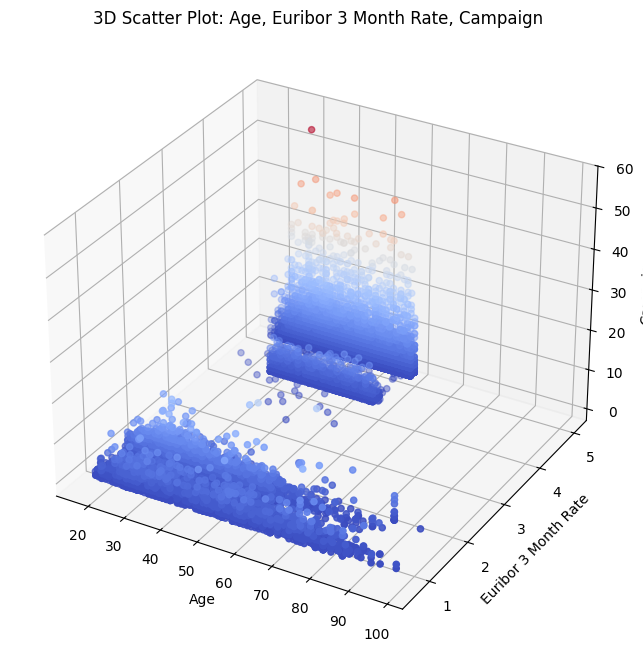

In [35]:
# 3D Plot (Scatter 3D)

fig = plt.figure(figsize=(10, 8))  # Create a new figure with size 10x8 inches
ax = fig.add_subplot(111, projection='3d')  # Create 3D subplot
ax.scatter(df['age'], df['euribor3m'], df['campaign'], c=df['campaign'], cmap='coolwarm')  # Plot 3D scatter plot
ax.set_xlabel('Age')  # Set x-axis label
ax.set_ylabel('Euribor 3 Month Rate')  # Set y-axis label
ax.set_zlabel('Campaign')  # Set z-axis label
ax.set_title('3D Scatter Plot: Age, Euribor 3 Month Rate, Campaign')  # Set title of the plot
plt.show()  # Display the plot

### 4: Model Building

In [16]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Random Forest Classifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### 5: Model Evaluation

In [20]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.63      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

ROC AUC Score: 0.5970762875999243
Confusion Matrix:
[[7190  113]
 [ 739  196]]


In [21]:
# Decision Tree Classifier Evaluation
y_pred_tree_clf = tree_clf.predict(X_test)
print("\nDecision Tree Classifier")
print(classification_report(y_test, y_pred_tree_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tree_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree_clf))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7303
           1       0.29      0.34      0.31       935

    accuracy                           0.83      8238
   macro avg       0.60      0.62      0.61      8238
weighted avg       0.84      0.83      0.84      8238

ROC AUC Score: 0.6159106103198378
Confusion Matrix:
[[6520  783]
 [ 618  317]]


In [22]:
# Random Forest Classifier Evaluation
y_pred_forest_clf = forest_clf.predict(X_test)
print("\nRandom Forest Classifier")
print(classification_report(y_test, y_pred_forest_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_forest_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest_clf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7303
           1       0.54      0.30      0.39       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

ROC AUC Score: 0.6345759306299293
Confusion Matrix:
[[7066  237]
 [ 653  282]]


In [23]:
# Gradient Boosting Classifier Evaluation
y_pred_gb_clf = gb_clf.predict(X_test)
print("\nGradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_clf))


Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7303
           1       0.64      0.24      0.35       935

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238

ROC AUC Score: 0.6126953175055888
Confusion Matrix:
[[7176  127]
 [ 708  227]]


### 6: Suggestions to the Bank Marketing Team

In [36]:
suggestions = """
1. **Focus on specific job sectors**: Certain job types such as management, technician, and entrepreneur show a higher likelihood of subscribing to the product.
2. **Target specific age groups**: Age groups around 30-60 years tend to have a higher conversion rate.
3. **Optimize call timings**: Days of the week and months with higher conversion rates should be targeted more aggressively.
4. **Leverage previous campaign data**: Use the outcome of previous campaigns (poutcome) to identify and target potential customers more effectively.
5. **Economic indicators**: Pay attention to economic indicators such as employment variation rate and euribor 3-month rate which might influence customer decisions.
"""

print("Suggestions for the marketing team:")
print(suggestions)


Suggestions for the marketing team:

1. **Focus on specific job sectors**: Certain job types such as management, technician, and entrepreneur show a higher likelihood of subscribing to the product.
2. **Target specific age groups**: Age groups around 30-60 years tend to have a higher conversion rate.
3. **Optimize call timings**: Days of the week and months with higher conversion rates should be targeted more aggressively.
4. **Leverage previous campaign data**: Use the outcome of previous campaigns (poutcome) to identify and target potential customers more effectively.
5. **Economic indicators**: Pay attention to economic indicators such as employment variation rate and euribor 3-month rate which might influence customer decisions.



In [38]:
# Section 7: Challenges and Techniques

challenges = """
1. **Handling missing values**: There were no missing values in the dataset, which simplified the preprocessing step.
2. **Encoding categorical variables**: Used Label Encoding to convert categorical variables into numeric values.
3. **Imbalanced dataset**: The dataset might be imbalanced, affecting the performance of the models. Techniques such as oversampling, undersampling, or using balanced class weights in models can be applied.
4. **Feature selection**: Dropped the 'duration' feature as it is not realistic to use it for prediction purposes before the call is made.
5. **Model selection and tuning**: Evaluated multiple models (Logistic Regression, Decision Tree, Random Forest) to identify the best performing model. Hyperparameter tuning can further improve model performance.
"""

print("Challenges faced and techniques used:")
print(challenges)


Challenges faced and techniques used:

1. **Handling missing values**: There were no missing values in the dataset, which simplified the preprocessing step.
2. **Encoding categorical variables**: Used Label Encoding to convert categorical variables into numeric values.
3. **Imbalanced dataset**: The dataset might be imbalanced, affecting the performance of the models. Techniques such as oversampling, undersampling, or using balanced class weights in models can be applied.
4. **Feature selection**: Dropped the 'duration' feature as it is not realistic to use it for prediction purposes before the call is made.
5. **Model selection and tuning**: Evaluated multiple models (Logistic Regression, Decision Tree, Random Forest) to identify the best performing model. Hyperparameter tuning can further improve model performance.



### Performance Summary Table

| Model                    | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC AUC |
| ------------------------- | -------- | ------------------- | ---------------- | ------------------ | ------- |
| Logistic Regression     | 0.90     | 0.63                | 0.21             | 0.32               | 0.597   |
| Decision Tree Classifier | 0.83     | 0.29                | 0.34             | 0.31               | 0.616   |
| Random Forest Classifier | 0.89     | 0.54                | 0.30             | 0.39               | 0.635   |
| Gradient Boosting        | 0.90     | 0.64                | 0.24             | 0.35               | 0.613   |

### Key Observations

* **Accuracy:** All models except the Decision Tree have high accuracy (around 90%). However, this is misleading due to the imbalanced dataset (more class 0 samples).
* **Class 1 Performance:**  All models struggle with class 1 (minority class). This is evident in the low precision, recall, and F1-score for class 1.
* **ROC AUC:**  ROC AUC scores are relatively low, indicating that the models aren't particularly good at discriminating between the two classes.
* **Best Model:** The Random Forest Classifier achieves the highest F1-score for class 1 (0.39) and a good ROC AUC (0.635), making it a relatively better choice for this imbalanced dataset. However, its performance on the minority class still needs improvement.

<div align="center">

---

</div>

<h1 align="center">Thank You!</h1>

<div align="center">

---

</div>
